#Bank Currency Authentication

###Problem Definition
####The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.

In [1]:
from google.colab import files
upload=files.upload()

Saving bill_authentication.csv to bill_authentication.csv


In [14]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Importing Dataset
dataset = pd.read_csv('bill_authentication.csv')
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
# Summary
def summary(dataset):
    df = {
     'Count' : dataset.shape[0],
     'NA values' : dataset.isna().sum(),
     '% NA' : round((dataset.isna().sum()/dataset.shape[0]) * 100, 2),
     'Unique' : dataset.nunique(),
     'Dtype' : dataset.dtypes,
     'min' : round(dataset.min(),2),
     '25%' : round(dataset.quantile(.25),2),
     '50%' : round(dataset.quantile(.50),2),
     'mean' : round(dataset.mean(),2),
     '75%' : round(dataset.quantile(.75),2),   
     'max' : round(dataset.max(),2)
    } 
    return(pd.DataFrame(df))

print('Shape is :', dataset.shape)
summary(dataset)

Shape is : (1372, 5)


,Count,NA values,% NA,Unique,Dtype,min,25%,50%,mean,75%,max
Variance,1372,0,0.0,1338,float64,-7.04,-1.77,0.50,0.43,2.82,6.82
Skewness,1372,0,0.0,1256,float64,-13.77,-1.71,2.32,1.92,6.81,12.95
Curtosis,1372,0,0.0,1270,float64,-5.29,-1.57,0.62,1.40,3.18,17.93
Entropy,1372,0,0.0,1156,float64,-8.55,-2.41,-0.59,-1.19,0.39,2.45
Class,1372,0,0.0,2,int64,0.00,0.00,0.00,0.44,1.00,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d1ed0c950>,
      dtype=object)

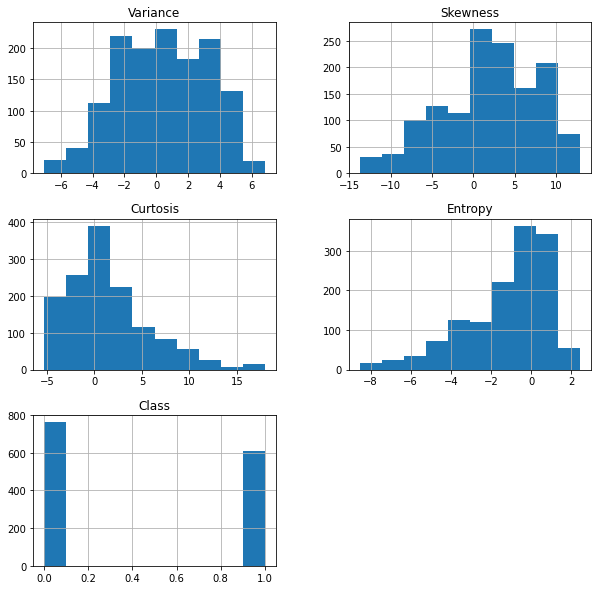

In [8]:
dataset.hist(figsize = (10,10))


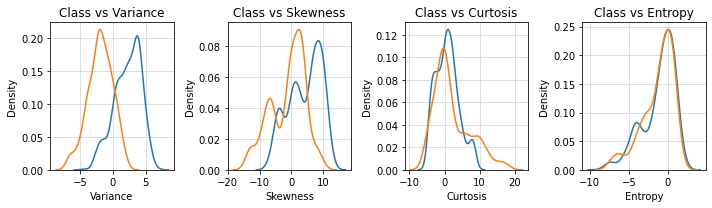

In [18]:
col_names = dataset.drop('Class', axis = 1).columns.tolist()

plt.figure(figsize = (10,3))
i = 0
for col in col_names:
    plt.subplot(1,4,i+1)
    plt.grid(True, alpha =0.5)
    sns.kdeplot(dataset[col][dataset['Class'] ==0], label = 'Fake note')
    sns.kdeplot(dataset[col][dataset['Class'] ==1], label = 'Original note')
    plt.title('Class vs ' + col)
    plt.tight_layout()
    i+=1
plt.show()

In [19]:
#Preparing Data For Training
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [20]:
#Finally, let's divide the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [22]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[155   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091
